<a href="https://colab.research.google.com/github/KulturTech/LIST_EUPac/blob/main/LIST_NER_Model_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CCS-ZCU/EuPaC_shared/blob/master/LIST_getting-started.ipynb)

This Jupyter notebook has been prepared for the EuPaC Hackathon and provides an easy way to start working with the LIST dataset — no need to clone the entire repository or download additional data. It is fully compatible with cloud platforms like Google Colaboratory (click the badge above) and runs without requiring any specialized library installations.

As such, it is intended as a starting point for EuPaC participants, including those with minimal coding experience.

In [1]:
import os
import requests
import geopandas as gpd
import numpy as np

In [2]:
# (1) download the dataset file in the parquet file format directly from zenodo:
# (feel free to change the download location following the --output parameter)
# Create directory for data and subdirectories if not already existent
os.makedirs("data/large_data", exist_ok=True)

!curl https://zenodo.org/records/10473706/files/LIST_v1-2.parquet --output data/large_data/LIST_v1-2.parquet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104M  100  104M    0     0  1872k      0  0:00:57  0:00:57 --:--:-- 10.3M


In [3]:
LIST = gpd.read_parquet("data/large_data/LIST_v1-2.parquet")

In [4]:
LIST.shape

(525870, 65)

In [5]:
LIST.head(5)

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,Longitude,Latitude,is_geotemporal,geometry,is_within_RE,urban_context,urban_context_city,urban_context_pop_est,type_of_inscription_auto,type_of_inscription_auto_prob
445463,445464,EDCS-24900077,HD056163,https://www.trismegistos.org/text/177366,570485,Q(uinto) Caecilio C(ai) f(ilio) Metelo / imper...,Q(uinto) Caecilio C(ai) f(ilio) Metel(l)o / im...,Q Caecilio C f Metelo imperatori Italici quei ...,Quinto Caecilio Cai filio Metelo imperatori It...,Quinto Caecilio Cai filio Metelo imperatori It...,...,22.841200,37.649800,True,POINT (22.8412 37.6498),True,rural,None,NaN,honorific inscription,1.0
445464,445465,EDCS-03700724,HD052964,https://www.trismegistos.org/text/121715,531064,Fortissimo et piis/simo Caesari d(omino) n(ost...,Fortissimo et Piis/simo Caesari d(omino) n(ost...,Fortissimo et piissimo Caesari d n Gal Val P F...,Fortissimo et piissimo Caesari domino nostro G...,Fortissimo et piissimo Caesari domino nostro G...,...,20.766800,39.451200,True,POINT (20.7668 39.4512),True,rural,None,NaN,honorific inscription,1.0
445465,445466,EDCS-13800065,HD017714,https://www.trismegistos.org/text/177100,570049,Italicei / quei Aegei negotiantur / P(ublium) ...,Italicei / quei Aegei negotiantur / P(ublium) ...,Italicei quei Aegei negotiantur P Rutilium P f...,Italicei quei Aegei negotiantur Publium Rutili...,Italicei quei Aegei negotiantur Publium Rutili...,...,22.084500,38.248700,True,POINT (22.0845 38.2487),True,small,Aegium,1000.0,votive inscription,1.0
445466,445467,EDCS-03300852,HD051000,https://www.trismegistos.org/text/177273,240855,[Imp(eratori) Caes(ari) M(arco)] / An[nio] Flo...,Imp(eratori) / Floriano / P(io) F(elici) Aug(u...,An Floriano P F Aug p p m p III Imp Caes M Aur...,Imperatori Caesari Marco Annio Floriano Pio Fe...,Imperatori Caesari Marco Annio Floriano Pio Fe...,...,22.417100,37.431900,True,POINT (22.4171 37.4319),True,large,Tegea,46362.0,mile-/leaguestone,1.0
445467,445468,EDCS-28500283,HD021396,https://www.trismegistos.org/text/177131,,T[i(berius)] Claudius Caesar Aug(ustus) / G[er...,T[(iberius)] Claudius Caesar Aug(ustus) / G[er...,T Claudius Caesar Aug Ganicus pontif max trib ...,Tiberius Claudius Caesar Augustus Germanicus p...,Tiberius Claudius Caesar Augustus Germanicus p...,...,22.420877,37.454501,True,POINT (22.42088 37.4545),True,large,Tegea,46362.0,public legal inscription,1.0


<Axes: >

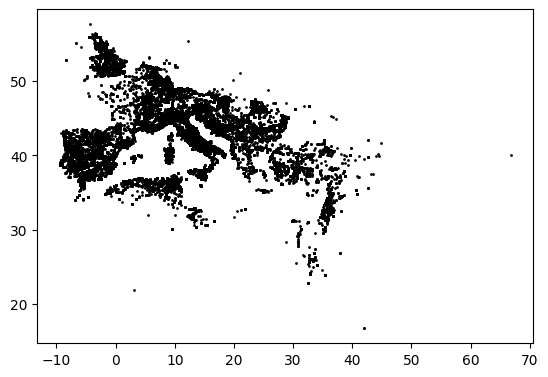

In [6]:
# spatial explorations
LIST[LIST["is_geotemporal"]].plot(color="black", markersize=1)

In [25]:
# textual explorations
LIST_texts = LIST["clean_text_interpretive_word"].tolist()
LIST_texts[:10]


['Quinto Caecilio Cai filio Metelo imperatori Italici quei Argeis negotiantur',
 'Fortissimo et piissimo Caesari domino nostro Galerio Valerio Maximiano Pio Felici Invicto Coranius Titianus vir perfectissimus praeses provinciae veteris Epiri numini eorum dicatissimus',
 'Italicei quei Aegei negotiantur Publium Rutilium Publi filium Nudum quaestorem',
 'Imperatori Caesari Marco Annio Floriano Pio Felici Augusto patri patriae milia passuum III Imperatori Caesari Marco Aurelio Probo Pio Felici Augusto milia passuum II',
 'Tiberius Claudius Caesar Augustus Germanicus pontifex maximus tribunicia potestate VIIII imperator XVI pater patriae dicit cum et colonias et municipia non solum Italiae verum etiam provinciarum item civitatium cuius que provinciae lebare oneribus vehiculorum praebendorum saepe temptavissem et cum satis multa remedia invenisse mihi viderer potuit tamen nequitiae hominum C RAS RVM aut falsa nomina ius dedit turo ante diem',
 'Decimius Secundinus vir clarissimus proconsul 

In [26]:
import spacy
from spacy.tokens import DocBin

In [27]:
# Liste typischer Berufsbezeichnungen (auch zusammengesetzt)
occupations = [
    "faber", "faber ferrarius", "faber aerarius", "aurifex",
    "monetarius", "argentarius", "flaturarius", "brattiarius"
]


In [28]:
def annotate_berufe(text, occupations):
    annotations = []
    for occupation in occupations:
        if occupation in text:
            start = text.index(occupation)
            end = start + len(occupation)
            annotations.append((start, end, "OCCUPATION"))
    return annotations

In [29]:
TRAIN_DATA = [
    ("Marcus Tullius aurifex hic situs est.", {
        "entities": [(0, 14, "PERSON"), (15, 22, "OCCUPATION")]
    }),
    ("Lucius Cornelius argentarius Romae vixit.", {
        "entities": [(0, 22, "PERSON"), (23, 35, "OCCUPATION")]
    }),
]
# Beispielhafter zusätzlicher Trainingsdatensatz aus EDCS/EDH (ersetzen Sie dies durch Ihre tatsächlichen Daten)
additional_data_from_metadata = [
    ("Ein Text aus EDCS mit einem Namen wie Lucius.", {"entities": [(35, 41, "PERSON")]}),
    ("Ein weiterer Text aus EDH über einen Fabius maximus.", {"entities": [(36, 49, "PERSON")]}),
    # Fügen Sie hier weitere Beispiele aus Ihren Metadaten hinzu
]

# Fügen Sie die zusätzlichen Daten zu Ihrem bestehenden TRAIN_DATA hinzu
TRAIN_DATA.extend(additional_data_from_metadata)

# Fahren Sie mit dem Training Ihres Modells fort wie im ursprünglichen Notebook
# ... (Code für die Modellinitialisierung, Training und Speicherung)

In [30]:
for text in LIST["clean_text_interpretive_word"].dropna():
    entities = annotate_berufe(text, occupations)
    if entities:
        TRAIN_DATA.append((
  "Fortunae praetoriae sacrum Lucius Mucius Nicephor ... donum dederunt",
  {"entities": [(107, 114, "OCCUPATION")]}  # z. B. "curator"
))


In [31]:
from spacy.training import Example

nlp = spacy.blank("la")  # leeres Lateinmodell
ner = nlp.add_pipe("ner")
ner.add_label("OCCUPATION")

db = DocBin()

for text, annotations in TRAIN_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annotations)
    db.add(example.reference)

# Speichere das Trainingsset
db.to_disk("train.spacy")

In [32]:
from random import shuffle

optimizer = nlp.begin_training()

for i in range(20):
    shuffle(TRAIN_DATA)
    losses = {}
    for text, annotations in TRAIN_DATA:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        nlp.update([example], sgd=optimizer, losses=losses)
    print(losses)

nlp.to_disk("my_ner_model")

{'ner': np.float32(37.152573)}
{'ner': np.float32(5.7833185)}
{'ner': np.float32(3.5997715)}
{'ner': np.float32(6.5732284)}
{'ner': np.float32(3.9857466)}
{'ner': np.float32(10.2843685)}
{'ner': np.float32(2.976081)}
{'ner': np.float32(1.1065261)}
{'ner': np.float32(0.45066532)}
{'ner': np.float32(4.1006797e-06)}
{'ner': np.float32(1.33973e-07)}
{'ner': np.float32(3.9453076e-09)}
{'ner': np.float32(6.512212e-08)}
{'ner': np.float32(2.8867847e-08)}
{'ner': np.float32(4.1098724e-09)}
{'ner': np.float32(2.5485505e-10)}
{'ner': np.float32(1.1092035e-08)}
{'ner': np.float32(1.1879348e-09)}
{'ner': np.float32(1.9797934e-09)}
{'ner': np.float32(4.1473087e-09)}


In [33]:
nlp_test = spacy.load("my_ner_model")
doc = nlp_test("Publius Caecilius aurifex hic iacet")
for ent in doc.ents:
    print(ent.text, ent.label_)

Publius Caecilius PERSON
aurifex OCCUPATION


In [34]:
import ast

# Funktion zum Parsen und Annotieren
def extract_ner_data(row):
    try:
        text = row["clean_text_interpretive_word"]
        if gpd.isna(text):
            return None
        occups_raw = row["occups"]
        if gpd.isna(occups_raw):
            return None
        occups_list = ast.literal_eval(occups_raw)  # Parse z. B. ['faber']
        entities = []
        for occ in occups_list:
            if occ in text:
                start = text.index(occ)
                end = start + len(occ)
                entities.append((start, end, "OCCUPATION"))
        if entities:
            return (text, {"entities": entities})
    except:
        return None

# Anwenden auf alle Zeilen
train_data = LIST.apply(extract_ner_data, axis=1).dropna().tolist()

# Zeige einige Beispiele
train_data[:10]

[]

In [35]:
from spacy import displacy

# Laden Sie Ihr trainiertes Modell
nlp_test = spacy.load("my_ner_model")

# Beispieltext
text = "Publius Caecilius aurifex hic iacet"

# Verwenden Sie das Modell für den Text
doc = nlp_test(text)

# Visualisieren Sie die Entitäten
displacy.render(doc, style="ent", jupyter=True)

In [39]:
# Begrenzen Sie die Anzahl der Zeilen zur Visualisierung, z.B. die ersten 10
num_examples_to_visualize = 10

# Filtern Sie den Datensatz, um nur Zeilen mit Text zu berücksichtigen
list_with_text = LIST.dropna(subset=["clean_text_interpretive_word"])

# Iterieren Sie durch die ausgewählten Zeilen und visualisieren Sie
for index, row in list_with_text.head(num_examples_to_visualize).iterrows():
    text = row["clean_text_interpretive_word"]
    doc = nlp_test(text)
    print(f"Original Text: {text}")
    displacy.render(doc, style="ent", jupyter=True)
    print("-" * 50) # Trennlinie zwischen den Visualisierungen

Original Text: Quinto Caecilio Cai filio Metelo imperatori Italici quei Argeis negotiantur


--------------------------------------------------
Original Text: Fortissimo et piissimo Caesari domino nostro Galerio Valerio Maximiano Pio Felici Invicto Coranius Titianus vir perfectissimus praeses provinciae veteris Epiri numini eorum dicatissimus


--------------------------------------------------
Original Text: Italicei quei Aegei negotiantur Publium Rutilium Publi filium Nudum quaestorem


--------------------------------------------------
Original Text: Imperatori Caesari Marco Annio Floriano Pio Felici Augusto patri patriae milia passuum III Imperatori Caesari Marco Aurelio Probo Pio Felici Augusto milia passuum II


--------------------------------------------------
Original Text: Tiberius Claudius Caesar Augustus Germanicus pontifex maximus tribunicia potestate VIIII imperator XVI pater patriae dicit cum et colonias et municipia non solum Italiae verum etiam provinciarum item civitatium cuius que provinciae lebare oneribus vehiculorum praebendorum saepe temptavissem et cum satis multa remedia invenisse mihi viderer potuit tamen nequitiae hominum C RAS RVM aut falsa nomina ius dedit turo ante diem


--------------------------------------------------
Original Text: Decimius Secundinus vir clarissimus proconsul curatori et defensori Amfissensium salutem ut memini non repurgari modo aquae ductum verum etiam induci aquam iusseram confestim igitur in veteres cisternas aqua ut semper cucurrerat inducatur gratias agente beatitudini temporis et moderationi meae Hesperio quod fundus qui aquam publicam occupavit publicus non fit sane ne similis interceptio iterum fieri possit in cisternis ipsis lapideo titulo posito unde aqua veniat adscribite ut nulla invadendi publicum renno lt v gt at lt u gt r occasio memores eritis perfecta haec omnia ante diem decimum Kalendarum Ianuariarum vos ad officium nuntiare debere opto bene valeatis


--------------------------------------------------
Original Text: Pro salute Imperatorum Caesaris Luci Septimi Severi et Marci Aureli Antonini Auggustorum et Publi Septimi Gaetae Caesaris Marcus Aurelius Rufinus evocatus Auggustorum nnostrorum Sancto Deo Invicto speleum constituit cum militibus praetorianis Flavio Clarino Aelio Messio Aurelio Iuliano


--------------------------------------------------
Original Text: Diogenes piscinam lt v gt eterem no lt v gt am fecit totam


--------------------------------------------------
Original Text: Octavius Salutaris


--------------------------------------------------
Original Text: tionee praecepimus maiori exuberante me aca haberet etiam con nostrae favor AECT


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


--------------------------------------------------


In [40]:
# Begrenzen Sie die Anzahl der Zeilen zur Visualisierung, z.B. die ersten 10
num_examples_to_visualize = 10

# Filtern Sie den Datensatz, um nur Zeilen mit Text zu berücksichtigen
list_with_text = LIST.dropna(subset=["clean_text_interpretive_word_EDCS"])

# Iterieren Sie durch die ausgewählten Zeilen und visualisieren Sie
for index, row in list_with_text.head(num_examples_to_visualize).iterrows():
    text = row["clean_text_interpretive_word"]
    doc = nlp_test(text)
    print(f"Original Text: {text}")
    displacy.render(doc, style="ent", jupyter=True)
    print("-" * 50) # Trennlinie zwischen den Visualisierungen

Original Text: Quinto Caecilio Cai filio Metelo imperatori Italici quei Argeis negotiantur


--------------------------------------------------
Original Text: Fortissimo et piissimo Caesari domino nostro Galerio Valerio Maximiano Pio Felici Invicto Coranius Titianus vir perfectissimus praeses provinciae veteris Epiri numini eorum dicatissimus


--------------------------------------------------
Original Text: Italicei quei Aegei negotiantur Publium Rutilium Publi filium Nudum quaestorem


--------------------------------------------------
Original Text: Imperatori Caesari Marco Annio Floriano Pio Felici Augusto patri patriae milia passuum III Imperatori Caesari Marco Aurelio Probo Pio Felici Augusto milia passuum II


--------------------------------------------------
Original Text: Tiberius Claudius Caesar Augustus Germanicus pontifex maximus tribunicia potestate VIIII imperator XVI pater patriae dicit cum et colonias et municipia non solum Italiae verum etiam provinciarum item civitatium cuius que provinciae lebare oneribus vehiculorum praebendorum saepe temptavissem et cum satis multa remedia invenisse mihi viderer potuit tamen nequitiae hominum C RAS RVM aut falsa nomina ius dedit turo ante diem


--------------------------------------------------
Original Text: Decimius Secundinus vir clarissimus proconsul curatori et defensori Amfissensium salutem ut memini non repurgari modo aquae ductum verum etiam induci aquam iusseram confestim igitur in veteres cisternas aqua ut semper cucurrerat inducatur gratias agente beatitudini temporis et moderationi meae Hesperio quod fundus qui aquam publicam occupavit publicus non fit sane ne similis interceptio iterum fieri possit in cisternis ipsis lapideo titulo posito unde aqua veniat adscribite ut nulla invadendi publicum renno lt v gt at lt u gt r occasio memores eritis perfecta haec omnia ante diem decimum Kalendarum Ianuariarum vos ad officium nuntiare debere opto bene valeatis


--------------------------------------------------
Original Text: Pro salute Imperatorum Caesaris Luci Septimi Severi et Marci Aureli Antonini Auggustorum et Publi Septimi Gaetae Caesaris Marcus Aurelius Rufinus evocatus Auggustorum nnostrorum Sancto Deo Invicto speleum constituit cum militibus praetorianis Flavio Clarino Aelio Messio Aurelio Iuliano


--------------------------------------------------
Original Text: Diogenes piscinam lt v gt eterem no lt v gt am fecit totam


--------------------------------------------------
Original Text: Octavius Salutaris


--------------------------------------------------
Original Text: tionee praecepimus maiori exuberante me aca haberet etiam con nostrae favor AECT


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


--------------------------------------------------


In [37]:
from spacy.training.iob_utils import offsets_to_biluo_tags

# Nehmen wir an, Sie haben einen Testsatz namens TEST_DATA im gleichen Format wie TRAIN_DATA
# TEST_DATA = [
#     ("Text 1", {"entities": [(start, end, "LABEL")]}),
#     ("Text 2", {"entities": [(start, end, "LABEL")]}),
#     ...
# ]

# Beispiel TEST_DATA (ersetzen Sie dies durch Ihren tatsächlichen Testsatz)
TEST_DATA = [
    ("Caius Julius monetarius Romam pervenit.", {"entities": [(0, 12, "PERSON"), (13, 23, "OCCUPATION")]}),
    ("Fabius Maximus faber hic laboravit.", {"entities": [(0, 13, "PERSON"), (14, 19, "OCCUPATION")]}),
]

# Laden Sie Ihr trainiertes Modell
nlp_test = spacy.load("my_ner_model")

# Listen zur Speicherung von vorhergesagten und tatsächlichen Tags
all_true_tags = []
all_pred_tags = []

# Iterieren Sie über den Testsatz
for text, annotations in TEST_DATA:
    doc = nlp_test(text)
    # Konvertieren Sie die Annotationen und Vorhersagen in BILUO-Tags
    true_tags = offsets_to_biluo_tags(doc, annotations["entities"])
    pred_tags = [f"{ent.start_char}-{ent.end_char}-{ent.label_}" for ent in doc.ents] # Einfache Darstellung der vorhergesagten Entitäten
    # Konvertieren Sie die vorhergesagten Entitäten auch in BILUO-Tags, um sie besser vergleichen zu können
    pred_tags_biluo = ["O"] * len(doc) # Initialisieren mit O (Outside)
    for ent in doc.ents:
        start_token = doc.char_span(ent.start_char, ent.end_char).start # Start-Token-Index
        end_token = doc.char_span(ent.start_char, ent.end_char).end # End-Token-Index
        if start_token is not None and end_token is not None:
            if start_token == end_token - 1:
                pred_tags_biluo[start_token] = f"U-{ent.label_}" # Unit-Tag
            else:
                pred_tags_biluo[start_token] = f"B-{ent.label_}" # Beginning-Tag
                for i in range(start_token + 1, end_token - 1):
                    pred_tags_biluo[i] = f"I-{ent.label_}" # Inside-Tag
                pred_tags_biluo[end_token - 1] = f"L-{ent.label_}" # Last-Tag


    all_true_tags.extend(true_tags)
    all_pred_tags.extend(pred_tags_biluo)

# Berechnen Sie die Metriken (Beispiel mit scikit-learn)
from sklearn.metrics import classification_report

# Filtert Tags heraus, die nicht in beiden Listen vorhanden sind, um Fehler zu vermeiden
# (Dies kann bei komplexen NER-Aufgaben notwendig sein)
# unique_tags = sorted(list(set(all_true_tags + all_pred_tags)))
# print(classification_report(all_true_tags, all_pred_tags, labels=unique_tags))

# Einfachere Berechnung, die nur die vorhandenen Tags berücksichtigt
print(classification_report(all_true_tags, all_pred_tags))

              precision    recall  f1-score   support

           -       0.00      0.00      0.00         3
    B-PERSON       0.50      1.00      0.67         1
    L-PERSON       0.50      1.00      0.67         1
           O       0.86      1.00      0.92         6
U-OCCUPATION       0.00      0.00      0.00         1

    accuracy                           0.67        12
   macro avg       0.37      0.60      0.45        12
weighted avg       0.51      0.67      0.57        12



/usr/local/lib/python3.11/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Fabius Maximus faber hic laboravit." with entities "[(0, 13, 'PERSON'), (14, 19, 'OCCUPATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi